In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

In [18]:
sensor_mag_0 = pd.read_csv("/media/data/Documentos/Skyrats/SkyanalysisTools/logs/sensor_mag_0/log_21_2021-8-12-18-27-34.csv")
actuator_armed_0 = pd.read_csv("/media/data/Documentos/Skyrats/SkyanalysisTools/logs/actuator_armed_0/log_21_2021-8-12-18-27-34.csv")
t0 = actuator_armed_0['timestamp'][0]
sensor_mag_0['time_rel'] = (sensor_mag_0['timestamp'] - t0)/1e6
sensor_mag_0

,timestamp,timestamp_sample,device_id,x,y,z,temperature,error_count,is_external,time_rel
0,797159012,797158987,327690,0.320666,0.064163,-0.376206,31.750,0,0,1.210915
1,798164738,798164707,327690,0.351359,0.046916,-0.373575,31.625,0,0,2.216641
2,799170849,799170815,327690,0.359105,0.040924,-0.369775,31.625,0,0,3.222752
3,800164669,800164641,327690,0.333674,0.104063,-0.780766,31.500,0,0,4.216572
4,801170726,801170701,327690,0.358813,0.056562,-0.359982,31.375,0,0,5.222629
...,...,...,...,...,...,...,...,...,...,...
356,1153171824,1153171799,327690,0.188980,0.014323,-0.279304,27.375,0,0,357.223727
357,1154165573,1154165548,327690,0.283251,-0.010377,-0.326220,27.500,0,0,358.217476
358,1155159049,1155159024,327690,0.375037,0.054516,-0.357352,27.500,0,0,359.210952
359,1156165194,1156165168,327690,0.370360,0.057732,-0.362613,27.375,0,0,360.217097


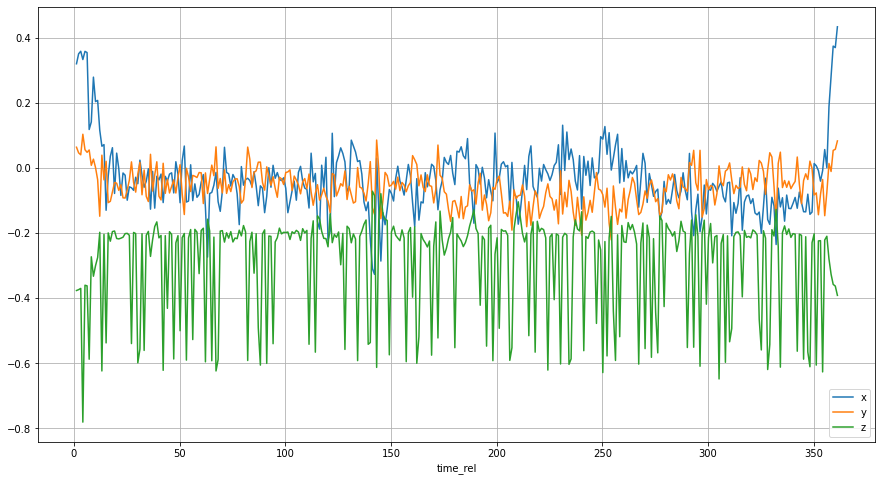

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# ax.set_ylim((-0.2, 0.2))
sensor_mag_0.plot(x='time_rel', y='x', ax=ax)
sensor_mag_0.plot(x='time_rel', y='y', ax=ax)
sensor_mag_0.plot(x='time_rel', y='z', ax=ax)
plt.legend()
plt.grid()

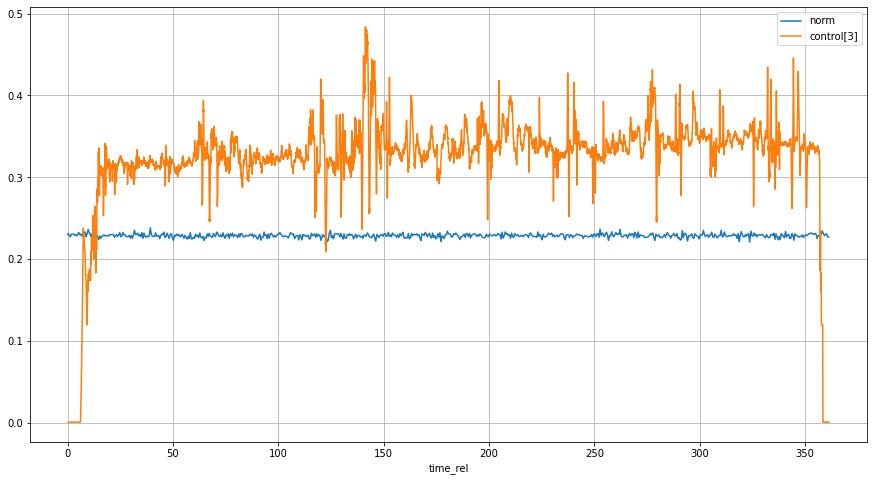

In [18]:
actuator_controls_0_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\actuator_controls_0_0\log_21_2021-8-12-18-27-34.csv")
vehicle_magnetometer_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\vehicle_magnetometer_0\log_21_2021-8-12-18-27-34.csv")

actuator_armed_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\actuator_armed_0\log_21_2021-8-12-18-27-34.csv")
t0 = actuator_armed_0['timestamp'][0]

vehicle_magnetometer_0['time_rel'] = (vehicle_magnetometer_0['timestamp'] - t0)/1e6
actuator_controls_0_0['time_rel'] = (actuator_controls_0_0['timestamp'] - t0)/1e6

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

vehicle_magnetometer_0['norm'] = np.sqrt(vehicle_magnetometer_0['magnetometer_ga[0]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[1]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[2]']**2)
vehicle_magnetometer_0.plot(y='norm', x='time_rel', ax=ax)
actuator_controls_0_0.plot(y='control[3]',x='time_rel',ax=ax)
plt.grid()

In [5]:
vehicle_magnetometer_0

,timestamp,timestamp_sample,device_id,magnetometer_ga[0],magnetometer_ga[1],magnetometer_ga[2],calibration_count,time_rel
0,796192096,796191096,527625,0.113453,0.128377,-0.153924,3,0.243999
1,796212323,796211085,527625,0.116387,0.126783,-0.154952,3,0.264226
2,796671935,796660872,527625,0.111368,0.133239,-0.150238,3,0.723838
3,797191873,797180868,527625,0.114696,0.125311,-0.151080,3,1.243776
4,797692008,797680867,527625,0.112826,0.129180,-0.153530,3,1.743911
...,...,...,...,...,...,...,...,...
719,1155187663,1155176636,527625,0.127240,0.125701,-0.142855,3,359.239566
720,1155687835,1155676823,527625,0.129967,0.124912,-0.143508,3,359.739738
721,1156207657,1156196633,527625,0.127253,0.128698,-0.143386,3,360.259560
722,1156708093,1156696839,527625,0.123879,0.124909,-0.143921,3,360.759996


In [6]:
actuator_controls_0_0

,timestamp,timestamp_sample,control[0],control[1],control[2],control[3],control[4],control[5],control[6],control[7],time_rel
0,796205947,796205638,-0.011597,-0.010552,-0.000303,0.001,0.0,0.0,0.0,-1.0,0.257850
1,796258399,796258076,-0.011953,-0.010210,0.000103,0.001,0.0,0.0,0.0,-1.0,0.310302
2,796307089,796306773,-0.011722,-0.010532,0.000039,0.001,0.0,0.0,0.0,-1.0,0.358992
3,796357034,796356718,-0.013659,-0.011769,-0.004611,0.001,0.0,0.0,0.0,-1.0,0.408937
4,796409481,796409163,-0.010546,-0.011847,0.010046,0.001,0.0,0.0,0.0,-1.0,0.461384
...,...,...,...,...,...,...,...,...,...,...,...
7219,1157157384,1157157069,0.049153,-0.024410,-0.001617,0.001,0.0,0.0,0.0,-1.0,361.209287
7220,1157206066,1157205759,0.049130,-0.024555,0.000171,0.001,0.0,0.0,0.0,-1.0,361.257969
7221,1157258501,1157258194,0.049793,-0.025893,0.001151,0.001,0.0,0.0,0.0,-1.0,361.310404
7222,1157308452,1157308132,0.048919,-0.025697,0.001784,0.001,0.0,0.0,0.0,-1.0,361.360355


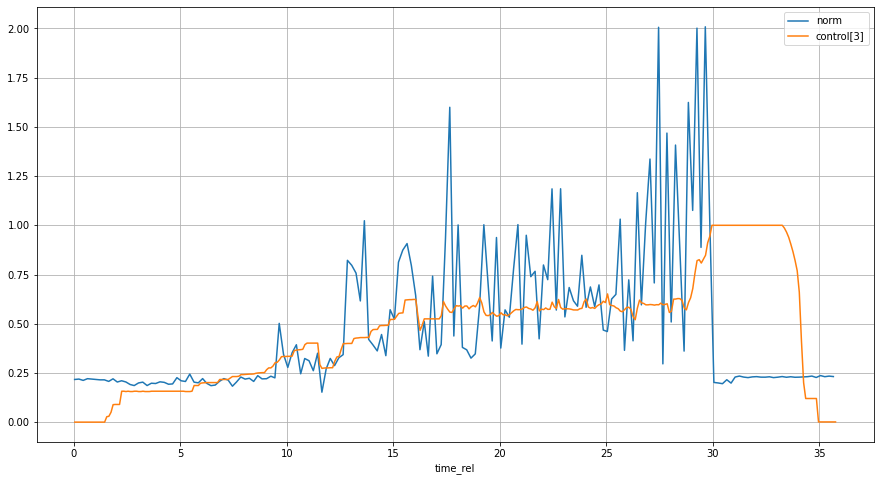

In [19]:
actuator_controls_0_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\actuator_controls_0_0\log_31_2021-7-9-16-35-26.csv")
vehicle_magnetometer_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\vehicle_magnetometer_0\log_31_2021-7-9-16-35-26.csv")

actuator_armed_0 = pd.read_csv(r"D:\Documentos\Skyrats\SkyanalysisTools\logs\actuator_armed_0\log_31_2021-7-9-16-35-26.csv")
t0 = actuator_armed_0['timestamp'][0]

vehicle_magnetometer_0['time_rel'] = (vehicle_magnetometer_0['timestamp'] - t0)/1e6
actuator_controls_0_0['time_rel'] = (actuator_controls_0_0['timestamp'] - t0)/1e6

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

vehicle_magnetometer_0['norm'] = np.sqrt(vehicle_magnetometer_0['magnetometer_ga[0]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[1]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[2]']**2)
vehicle_magnetometer_0.plot(y='norm', x='time_rel', ax=ax)
actuator_controls_0_0.plot(y='control[3]',x='time_rel',ax=ax)
plt.grid()


In [24]:
count = 0
for a in vehicle_magnetometer_0['time_rel']:
    for b in actuator_controls_0_0['time_rel']:
        if abs(a-b) < 0.01:
            count += 1
print(count)
print(len(vehicle_magnetometer_0['time_rel']))
print(len(actuator_controls_0_0['time_rel']))

144
180
359
